In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=ddf1891f740f585e6d23eff7858b1f0db9165b91f5df039e0724581146c777e2
  Stored in directory: C:\Users\T-H-Ley 2-Best\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [ ]:
### Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
## overview of the head of the dataset
telco_churn = pd.read_csv('datasets_Telco-Customer-Churn.csv')
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
##  review
telco_churn.shape

(7043, 21)

In [24]:
## overview of  the dataset
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
## Identify missing value
telco_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
telco_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
## Separate categorical and numerical values
telco_churn.select_dtypes('object').head

<bound method NDFrame.head of       customerID  gender Partner Dependents PhoneService     MultipleLines  \
0     7590-VHVEG  Female     Yes         No           No  No phone service   
1     5575-GNVDE    Male      No         No          Yes                No   
2     3668-QPYBK    Male      No         No          Yes                No   
3     7795-CFOCW    Male      No         No           No  No phone service   
4     9237-HQITU  Female      No         No          Yes                No   
...          ...     ...     ...        ...          ...               ...   
7038  6840-RESVB    Male     Yes        Yes          Yes               Yes   
7039  2234-XADUH  Female     Yes        Yes          Yes               Yes   
7040  4801-JZAZL  Female     Yes        Yes           No  No phone service   
7041  8361-LTMKD    Male     Yes         No          Yes               Yes   
7042  3186-AJIEK    Male      No         No          Yes                No   

     InternetService OnlineSecuri

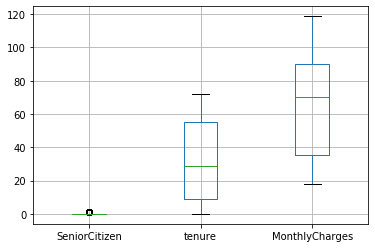

In [9]:
## Graph 
telco_churn.boxplot()

In [10]:
telco_churn.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [64]:
## Total sum of charges
## convert totalCharges in Float
telco_churn['TotalCharges'] = pd.to_numeric(telco_churn['TotalCharges'],errors='coerce')
telco_churn.TotalCharges.sum()

16056168.7

In [67]:
## percentage of the Total charges compared to the churn
df1 = telco_churn[['Churn','TotalCharges']].groupby(['Churn']).TotalCharges.sum().to_frame()/df1['TotalCharges'].sum()
df1

,TotalCharges
Churn,
No,0.821693
Yes,0.178307


In [54]:
## Total sum of monthly charges
telco_churn.MonthlyCharges.sum()

456116.6

In [55]:
## total sum of monthly charges of the churn
df_churned = telco_churn[telco_churn.Churn == 'Yes']
df_churned.MonthlyCharges.sum()

139130.85

In [58]:
## Data frame of the total monthly charges compared to the churn
df = telco_churn[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()
df

,MonthlyCharges
Churn,
No,316985.75
Yes,139130.85


In [59]:
## percentage of the monthly charges compared to the churn
df = telco_churn[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df['MonthlyCharges'].sum()
df

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


In [13]:
## Total numbers of churn
df = telco_churn[['Churn']].groupby(['Churn']).size()
df

Churn
No     5174
Yes    1869
dtype: int64

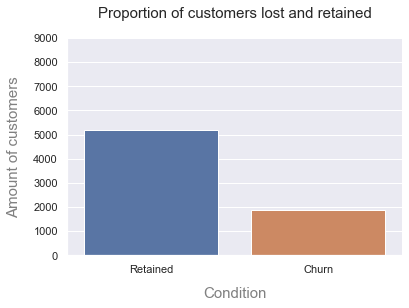

In [50]:
## proportion  of customers lost and retained
sns.countplot(x='Churn',data=telco_churn)
plt.xticks([0,1], ['Retained','Churn'])
plt.xlabel('Condition',size=15, labelpad=12,color='grey')
plt.ylabel('Amount of customers',size=15, labelpad=12,color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0,9000)
sns.despine()

In [14]:
## percentage of total numbers of churn
df = telco_churn[['Churn']].groupby(['Churn']).size()/telco_churn['Churn'].count()
df

Churn
No     0.73463
Yes    0.26537
dtype: float64

In [151]:
## Dataframe of the churned
df_churned = telco_churn[telco_churn.Churn == 'Yes']
df_churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [29]:
ax=plt.figure(figsize=(12,8))
sns.lineplot(y=)

SyntaxError: invalid syntax (<ipython-input-29-d738e9fa3ae9>, line 2)

In [70]:
## comparison of internet service with gender
df_churned[['gender','InternetService']].groupby(['gender','InternetService']).size().to_frame().rename(columns={0:'count'}).reset_index()


,gender,InternetService,count
0,Female,DSL,219
1,Female,Fiber optic,664
2,Female,No,56
3,Male,DSL,240
4,Male,Fiber optic,633
5,Male,No,57


In [111]:
## comparison of internet service with dependents
df_churned[['Dependents','InternetService']].groupby(['Dependents','InternetService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Dependents,InternetService,count
0,No,DSL,363
1,No,Fiber optic,1095
2,No,No,85
3,Yes,DSL,96
4,Yes,Fiber optic,202
5,Yes,No,28


In [112]:
## comparison of internet service with Partner
df_churned[['Partner','InternetService']].groupby(['Partner','InternetService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Partner,InternetService,count
0,No,DSL,321
1,No,Fiber optic,795
2,No,No,84
3,Yes,DSL,138
4,Yes,Fiber optic,502
5,Yes,No,29


In [71]:
## comparison of phone service with gender
df_churned[['gender','PhoneService']].groupby(['gender','PhoneService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,gender,PhoneService,count
0,Female,No,80
1,Female,Yes,859
2,Male,No,90
3,Male,Yes,840


In [72]:
## comparison of phone service with dependents
df_churned[['Dependents','PhoneService']].groupby(['Dependents','PhoneService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Dependents,PhoneService,count
0,No,No,147
1,No,Yes,1396
2,Yes,No,23
3,Yes,Yes,303


In [113]:
## comparison of phone service with PartnerPartner
df_churned[['Partner','PhoneService']].groupby(['Partner','PhoneService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Partner,PhoneService,count
0,No,No,109
1,No,Yes,1091
2,Yes,No,61
3,Yes,Yes,608


In [73]:
## comparison of senior citizen with gender
df_churned[['gender','SeniorCitizen']].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).reset_index()

,gender,SeniorCitizen,count
0,Female,0,699
1,Female,1,240
2,Male,0,694
3,Male,1,236


In [74]:
## comparison of senior citizen with dependents
df_churned[['Dependents','SeniorCitizen']].groupby(['Dependents','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Dependents,SeniorCitizen,count
0,No,0,1089
1,No,1,454
2,Yes,0,304
3,Yes,1,22


In [115]:
## comparison of senior citizen with Partner
df_churned[['Partner','SeniorCitizen']].groupby(['Partner','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Partner,SeniorCitizen,count
0,No,0,922
1,No,1,278
2,Yes,0,471
3,Yes,1,198


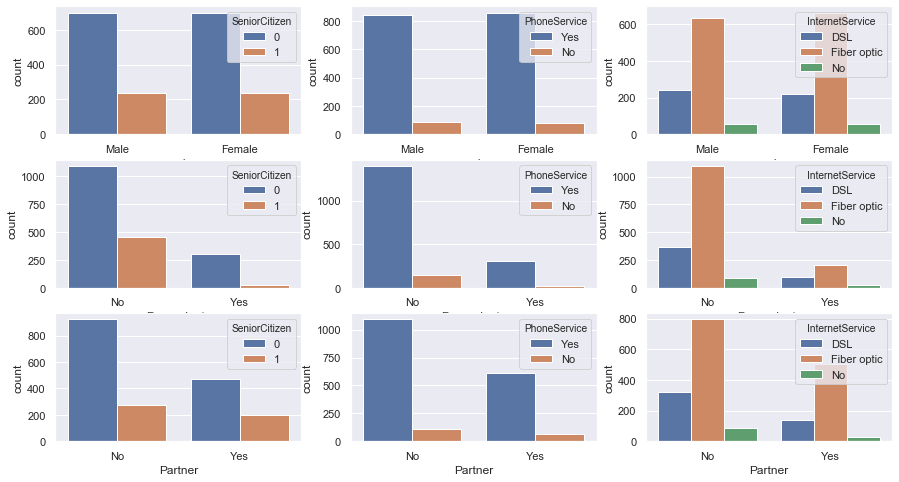

In [116]:
## representative graph of the six cases
fig,axes = plt.subplots(3,3,figsize = (15,8))
sns.set(style='darkgrid')
ax1 = sns.countplot(x='gender', hue='SeniorCitizen', data=df_churned, ax=axes[0,0])
ax2 = sns.countplot(x='Dependents', hue='SeniorCitizen', data=df_churned, ax=axes[1,0])
ax3 = sns.countplot(x='Partner', hue='SeniorCitizen', data=df_churned, ax=axes[2,0])
ax4 = sns.countplot(x='gender', hue='PhoneService', data=df_churned, ax=axes[0,1])
ax5 = sns.countplot(x='Dependents', hue='PhoneService', data=df_churned, ax=axes[1,1])
ax6 = sns.countplot(x='Partner', hue='PhoneService', data=df_churned, ax=axes[2,1])
ax7 = sns.countplot(x='gender', hue='InternetService', data=df_churned, ax=axes[0,2])
ax8 = sns.countplot(x='Dependents', hue='InternetService', data=df_churned, ax=axes[1,2])
ax9 = sns.countplot(x='Partner', hue='InternetService', data=df_churned, ax=axes[2,2])

In [149]:
## comparison of churned by Partner
df_churned[['Partner']].groupby(['Partner']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Partner,count
0,No,1200
1,Yes,669


In [153]:
## comparison of churned by gender
df_churned[['gender']].groupby(['gender']).size().to_frame().rename(columns={0:'count'}).reset_index()

,gender,count
0,Female,939
1,Male,930


In [152]:
## comparison of churned by Dependents
df_churned[['Dependents']].groupby(['Dependents']).size().to_frame().rename(columns={0:'count'}).reset_index()

,Dependents,count
0,No,1543
1,Yes,326


In [154]:
## comparison of churned by InternetService
df_churned[['InternetService']].groupby(['InternetService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,InternetService,count
0,DSL,459
1,Fiber optic,1297
2,No,113


In [155]:
## comparison of churned by PhoneService
df_churned[['PhoneService']].groupby(['PhoneService']).size().to_frame().rename(columns={0:'count'}).reset_index()

,PhoneService,count
0,No,170
1,Yes,1699


In [39]:
## Number of columns of type object
col=telco_churn.columns[telco_churn.columns.dtype == 'object']
col = col[0]
col

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [40]:
## Number of columns of type object except customerID and TotalCharges
ignore_col = ['customerID','TotalCharges']
num_cols = [x for x in col if x not in ignore_col]
num_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'Churn']

In [41]:
## dataset of the categorical object
categorical = telco_churn[num_cols]
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [42]:
### creation of a dictionary replacing in column gender female by 1 and male by 0 in the dataset of the categorical object
dict_gender = {'Female':1, 'Male':0}
categorical['gender'] = categorical['gender'].replace(dict_gender)

C:\Users\T-H-Ley 2-Best\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
set(categorical['MultipleLines'])

{'No', 'No phone service', 'Yes'}

In [44]:
### creation of a dictionary replacing in column MultipleLines No by 0,No phone service by 1 and Yes by 2 in the dataset of the categorical object
dict_mult = {'No':0, 'No phone service':1, 'Yes':2}
categorical['MultipleLines'] = categorical['MultipleLines'].replace(dict_mult)

C:\Users\T-H-Ley 2-Best\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
### creation of a dictionary replacing in column Churn No by 0 and Yes by 1 in the dataset of the categorical object
dict_churn = {'Yes':1, 'No':0}
categorical['Churn'] = categorical['Churn'].replace(dict_churn)

C:\Users\T-H-Ley 2-Best\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
### Correlation of categorical values
categorical.corr()

,gender,SeniorCitizen,tenure,MultipleLines,MonthlyCharges,Churn
gender,1.000000,0.001874,-0.005106,0.006739,0.014569,0.008612
SeniorCitizen,0.001874,1.000000,0.016567,0.146185,0.220173,0.150889
tenure,-0.005106,0.016567,1.000000,0.343032,0.247900,-0.352229
MultipleLines,0.006739,0.146185,0.343032,1.000000,0.433576,0.038037
MonthlyCharges,0.014569,0.220173,0.247900,0.433576,1.000000,0.193356
Churn,0.008612,0.150889,-0.352229,0.038037,0.193356,1.000000


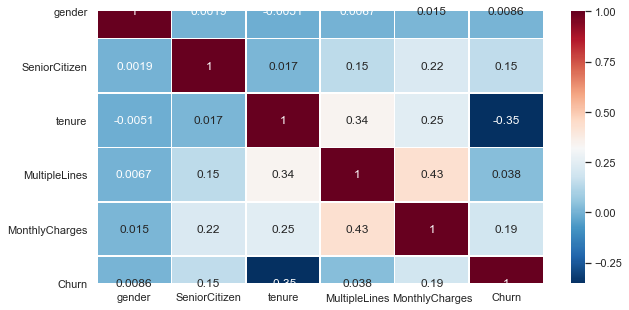

In [48]:
## representative graph
plt.figure(figsize=(10,5))
sns.heatmap(categorical.corr(),annot = True, linewidth = 0.6,cmap ='RdBu_r')
plt.show()

In [148]:
import math
n=float(round(-(1+(math.log(len(df))/math.log(1-0,2654))),0)+1)
x=round(n/12)
y=round(12*np.modf(n/12)[0])
display('The company will lose all its customers after {} years and {} months'.format(x,y))

ZeroDivisionError: float division by zero

In [147]:
## comparison of churned by Partner
df_churned[['Partner']].groupby(['Partner']).size().to_frame().rename(columns={0:'count'}).reset_index()


,Partner,count
0,No,1200
1,Yes,669


In [145]:
dict_partner = {'Yes':1, 'No':0}
categorical['Partner'] = categorical['Partner'].replace(dict_partner)

C:\Users\T-H-Ley 2-Best\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_partner=
percent_partner=100-round((shape[0]/.shape))